In [1]:
import sklearn as sk

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import dump_svmlight_file


In [4]:
df = pd.read_csv("D:/Work/datascience-ws/dataset/kaggle/titanic/train.csv").set_index('PassengerId')

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
select_feature = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Name']
obj_df = df[select_feature].copy()

In [7]:
obj_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris"
2,1,1,female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina"
4,1,1,female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry"


In [8]:
#obj_df["Title"] = np.where(obj_df["Name"].str.contains("Mr."),"Mr",other="a")
#obj_df["Title"] = np.where(true,"Mr",other="a")
#obj_df.dtypes
obj_df["Title"] = np.where(obj_df["Name"].str.contains("Miss."),"Miss",obj_df["Name"])
obj_df["Title"] = np.where(obj_df["Title"].str.contains("Mrs."),"Mrs.",obj_df["Title"])
obj_df["Title"] = np.where(obj_df["Title"].str.contains("Mr\."),"Mr.",obj_df["Title"])
obj_df["Title"] = np.where(obj_df["Title"].str.contains("Master."),"Master",obj_df["Title"])
obj_df["Title"] = np.where(obj_df["Title"].str.contains("Sir."),"Sir",obj_df["Title"])
searchfor = ["Miss", "Mrs","Mr","Master","Sir"]
obj_df["Title"] = np.where(obj_df["Title"].str.contains('|'.join(searchfor)),obj_df["Title"],'NaN')

In [9]:
obj_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",Mr.
2,1,1,female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.
3,1,3,female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",Miss
4,1,1,female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.
5,0,3,male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",Mr.
6,0,3,male,NaN,0,0,8.4583,Q,"Moran, Mr. James",Mr.
7,0,1,male,54.0,0,0,51.8625,S,"McCarthy, Mr. Timothy J",Mr.
8,0,3,male,2.0,3,1,21.0750,S,"Palsson, Master. Gosta Leonard",Master
9,1,3,female,27.0,0,2,11.1333,S,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs.


In [10]:
cleanup_nums = {"Sex":     {"male": 1, "female": 0}}
obj_df.replace(cleanup_nums, inplace=True)

In [11]:
obj_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Title
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",Mr.
2,1,1,0,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.
3,1,3,0,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",Miss
4,1,1,0,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.
5,0,3,1,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",Mr.


In [12]:
obj_df["family_ppl_count"] = obj_df["SibSp"] + df["Parch"]

In [13]:
obj_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Title,family_ppl_count
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",Mr.,1
2,1,1,0,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1
3,1,3,0,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",Miss,0
4,1,1,0,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1
5,0,3,1,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",Mr.,0


In [14]:
obj_df.dtypes

Survived              int64
Pclass                int64
Sex                   int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Embarked             object
Name                 object
Title                object
family_ppl_count      int64
dtype: object

In [15]:
age_bucket_array = np.linspace(0, 100, 10)
obj_df['Age_bins'] = pd.cut(obj_df.Age, age_bucket_array)

In [16]:
obj_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Title,family_ppl_count,Age_bins
PassengerId,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",Mr.,1,"(11.111, 22.222]"
2,1,1,0,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1,"(33.333, 44.444]"
3,1,3,0,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",Miss,0,"(22.222, 33.333]"
4,1,1,0,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1,"(33.333, 44.444]"
5,0,3,1,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",Mr.,0,"(33.333, 44.444]"


In [17]:
obj_df[["Age_bins", "Survived"]].groupby("Age_bins").mean()

,Survived
Age_bins,
"(0.0, 11.111]",0.573529
"(11.111, 22.222]",0.361963
"(22.222, 33.333]",0.396552
"(33.333, 44.444]",0.419118
"(44.444, 55.556]",0.407895
"(55.556, 66.667]",0.343750
"(66.667, 77.778]",0.000000
"(77.778, 88.889]",1.000000
"(88.889, 100.0]",NaN


In [18]:
import matplotlib.pyplot as plt

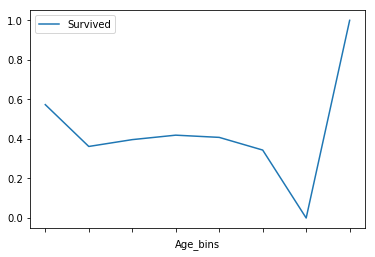

In [19]:
cols = ["Age_bins", "Survived"]
obj_df[cols].groupby("Age_bins").mean().plot()

In [20]:
fare_bucket_array = np.linspace(0, 600, 10)
obj_df['Fare_bins'] = pd.cut(obj_df.Fare, fare_bucket_array)

In [21]:
obj_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Title,family_ppl_count,Age_bins,Fare_bins
PassengerId,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",Mr.,1,"(11.111, 22.222]","(0.0, 66.667]"
2,1,1,0,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1,"(33.333, 44.444]","(66.667, 133.333]"
3,1,3,0,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",Miss,0,"(22.222, 33.333]","(0.0, 66.667]"
4,1,1,0,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1,"(33.333, 44.444]","(0.0, 66.667]"
5,0,3,1,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",Mr.,0,"(33.333, 44.444]","(0.0, 66.667]"


In [22]:
obj_df.dtypes

Survived               int64
Pclass                 int64
Sex                    int64
Age                  float64
SibSp                  int64
Parch                  int64
Fare                 float64
Embarked              object
Name                  object
Title                 object
family_ppl_count       int64
Age_bins            category
Fare_bins           category
dtype: object

In [23]:
obj_df["Age_bins_cat"] = obj_df["Age_bins"].cat.codes

In [24]:
obj_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Title,family_ppl_count,Age_bins,Fare_bins,Age_bins_cat
PassengerId,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",Mr.,1,"(11.111, 22.222]","(0.0, 66.667]",1
2,1,1,0,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1,"(33.333, 44.444]","(66.667, 133.333]",3
3,1,3,0,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",Miss,0,"(22.222, 33.333]","(0.0, 66.667]",2
4,1,1,0,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1,"(33.333, 44.444]","(0.0, 66.667]",3
5,0,3,1,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",Mr.,0,"(33.333, 44.444]","(0.0, 66.667]",3


In [25]:
obj_df["Fare_bins_cat"] = obj_df["Fare_bins"].cat.codes
Family_ppl_count_bucket_array = np.linspace(0, 20, 5)
obj_df['Family_ppl_count_bins'] = pd.cut(obj_df.family_ppl_count, Family_ppl_count_bucket_array)
obj_df["Family_ppl_count_bins_cat"] = obj_df["Family_ppl_count_bins"].cat.codes
#obj_df["Title_cat"] = obj_df["Title"].cat.codes

In [26]:
obj_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Title,family_ppl_count,Age_bins,Fare_bins,Age_bins_cat,Fare_bins_cat,Family_ppl_count_bins,Family_ppl_count_bins_cat
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",Mr.,1,"(11.111, 22.222]","(0.0, 66.667]",1,0,"(0.0, 5.0]",0
2,1,1,0,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,1,"(33.333, 44.444]","(66.667, 133.333]",3,1,"(0.0, 5.0]",0
3,1,3,0,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",Miss,0,"(22.222, 33.333]","(0.0, 66.667]",2,0,NaN,-1
4,1,1,0,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,1,"(33.333, 44.444]","(0.0, 66.667]",3,0,"(0.0, 5.0]",0
5,0,3,1,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",Mr.,0,"(33.333, 44.444]","(0.0, 66.667]",3,0,NaN,-1


In [27]:
train_df = pd.get_dummies(obj_df,columns=["Title","Age_bins_cat","Fare_bins_cat","Family_ppl_count_bins_cat","Sex","Embarked","Pclass"])

In [28]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Name,family_ppl_count,Age_bins,Fare_bins,Family_ppl_count_bins,...,Family_ppl_count_bins_cat_0,Family_ppl_count_bins_cat_1,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",1,"(11.111, 22.222]","(0.0, 66.667]","(0.0, 5.0]",...,1,0,0,1,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,"(33.333, 44.444]","(66.667, 133.333]","(0.0, 5.0]",...,1,0,1,0,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",0,"(22.222, 33.333]","(0.0, 66.667]",NaN,...,0,0,1,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,"(33.333, 44.444]","(0.0, 66.667]","(0.0, 5.0]",...,1,0,1,0,0,0,1,1,0,0
5,0,35.0,0,0,8.0500,"Allen, Mr. William Henry",0,"(33.333, 44.444]","(0.0, 66.667]",NaN,...,0,0,0,1,0,0,1,0,0,1


In [29]:
train_df.dtypes

Survived                           int64
Age                              float64
SibSp                              int64
Parch                              int64
Fare                             float64
Name                              object
family_ppl_count                   int64
Age_bins                        category
Fare_bins                       category
Family_ppl_count_bins           category
Title_Master                       uint8
Title_Miss                         uint8
Title_Mr.                          uint8
Title_Mrs.                         uint8
Title_NaN                          uint8
Title_Sir                          uint8
Age_bins_cat_-1                    uint8
Age_bins_cat_0                     uint8
Age_bins_cat_1                     uint8
Age_bins_cat_2                     uint8
Age_bins_cat_3                     uint8
Age_bins_cat_4                     uint8
Age_bins_cat_5                     uint8
Age_bins_cat_6                     uint8
Age_bins_cat_7  

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
#features = np.array(['Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])
train_ohc=train_df.select_dtypes(include=['uint8'])
train_label=train_df["Survived"]
train_ohc.head()

,Title_Master,Title_Miss,Title_Mr.,Title_Mrs.,Title_NaN,Title_Sir,Age_bins_cat_-1,Age_bins_cat_0,Age_bins_cat_1,Age_bins_cat_2,...,Family_ppl_count_bins_cat_0,Family_ppl_count_bins_cat_1,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [32]:
train_label.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [33]:
#pd.merge(train_label.to_frame(),train_ohc)
train_ohc.join(train_label)

,Title_Master,Title_Miss,Title_Mr.,Title_Mrs.,Title_NaN,Title_Sir,Age_bins_cat_-1,Age_bins_cat_0,Age_bins_cat_1,Age_bins_cat_2,...,Family_ppl_count_bins_cat_1,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
5,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
9,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,1


In [34]:
clf = RandomForestClassifier()
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(train_ohc,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Text(0.5,1,'Variable Importance')

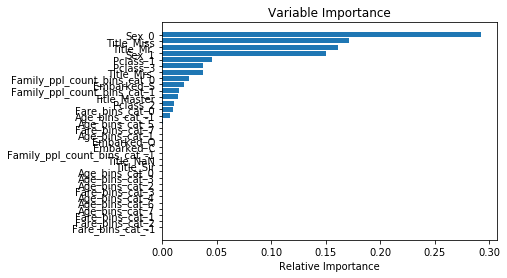

In [35]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(train_ohc.columns)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, train_ohc.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

In [36]:
import pandas_ml as pdml

In [37]:
train_prexgb_df = train_ohc.join(train_label)

In [38]:
train_xgb_df = pdml.ModelFrame(train_prexgb_df,target='Survived')

In [39]:
train_xgb_df.xgboost.XGBClassifier

xgboost.sklearn.XGBClassifier

In [40]:
train_xgb_df.xgboost.XGBRegressor

xgboost.sklearn.XGBRegressor

In [563]:
#deprecated
#xgb_train_df, xgb_test_df = train_xgb_df.cross_validation.train_test_split(test_size=0.33)
#from sklearn.model_selection import train_test_split  -- error
#xgb_train_df, xgb_test_df = train_test_split(train_xgb_df, test_size=0.33)
# sample() missing 1 required positional argument: 'estimator'
# xgb_train_df = train_xgb_df.sample(frac=0.8)
# xgb_test_df = train_xgb_df.drop(xgb_train_df.index)
xgb_train_df, xgb_test_df = train_xgb_df.model_selection.train_test_split(test_size=0.5)

In [564]:
xgb_test_df.shape

(446, 33)

In [925]:
estimator = train_xgb_df.xgboost.XGBClassifier(base_score=0.51, booster='gbtree', colsample_bylevel=0.39,
       colsample_bytree=0.67, gamma=0.33, learning_rate=0.38, max_delta_step=0,
       max_depth=13, min_child_weight=2, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0.31, reg_lambda=0.81, scale_pos_weight=0.67, seed=13,
       silent=True, subsample=1)
xgb_train_df.fit(estimator)

XGBClassifier(base_score=0.51, booster='gbtree', colsample_bylevel=0.39,
       colsample_bytree=0.67, gamma=0.33, learning_rate=0.38,
       max_delta_step=0, max_depth=13, min_child_weight=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=1, reg_alpha=0.31,
       reg_lambda=0.81, scale_pos_weight=0.67, seed=13, silent=True,
       subsample=1)

In [926]:
predicted = xgb_test_df.predict(estimator)

In [927]:
xgb_test_df.metrics.confusion_matrix()

Predicted,0,1
Target,,
0,263,18
1,55,110


In [928]:
# 'str' object is not callable
#xgb_train_df.xgboost.plot_importance()  

In [929]:
predicted.head()

723    0
587    0
686    0
536    1
40     1
dtype: int64

In [930]:
xgb_test_df.head()

,Survived,Title_Master,Title_Miss,Title_Mr.,Title_Mrs.,Title_NaN,Title_Sir,Age_bins_cat_-1,Age_bins_cat_0,Age_bins_cat_1,...,Family_ppl_count_bins_cat_0,Family_ppl_count_bins_cat_1,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
723,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
587,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
686,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
536,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
40,1,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1


In [931]:
predicted.to_csv(path="D:/Work/datascience-ws/dataset/kaggle/titanic/test_predict_result1.1.csv")

In [932]:
submit_df = pd.read_csv("D:/Work/datascience-ws/dataset/kaggle/titanic/test.csv").set_index('PassengerId')
submit_df["Survived"] = 1

In [933]:
select_feature = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked',"Name"]
submit_obj_df = submit_df[select_feature].copy()

cleanup_nums = {"Sex":     {"male": 1, "female": 0}}
submit_obj_df.replace(cleanup_nums, inplace=True)

submit_obj_df["family_ppl_count"] = submit_obj_df["SibSp"] + submit_obj_df["Parch"]
submit_obj_df["Title"] = np.where(submit_obj_df["Name"].str.contains("Miss."),"Miss",submit_obj_df["Name"])
submit_obj_df["Title"] = np.where(submit_obj_df["Title"].str.contains("Mrs."),"Mrs.",submit_obj_df["Title"])
submit_obj_df["Title"] = np.where(submit_obj_df["Title"].str.contains("Mr\."),"Mr.",submit_obj_df["Title"])
submit_obj_df["Title"] = np.where(submit_obj_df["Title"].str.contains("Master."),"Master",submit_obj_df["Title"])
submit_obj_df["Title"] = np.where(submit_obj_df["Title"].str.contains("Sir."),"Sir",submit_obj_df["Title"])
searchfor = ["Miss", "Mrs","Mr","Master","Sir"]
submit_obj_df["Title"] = np.where(submit_obj_df["Title"].str.contains('|'.join(searchfor)),submit_obj_df["Title"],'NaN')

submit_obj_df['Age_bins'] = pd.cut(submit_obj_df.Age, age_bucket_array)
submit_obj_df['Fare_bins'] = pd.cut(submit_obj_df.Fare, fare_bucket_array)
submit_obj_df["Age_bins_cat"] = submit_obj_df["Age_bins"].cat.codes

submit_obj_df["Fare_bins_cat"] = submit_obj_df["Fare_bins"].cat.codes
submit_obj_df['Family_ppl_count_bins'] = pd.cut(submit_obj_df.family_ppl_count, Family_ppl_count_bucket_array)
submit_obj_df["Family_ppl_count_bins_cat"] = submit_obj_df["Family_ppl_count_bins"].cat.codes
submit_obj_dummy_df = pd.get_dummies(submit_obj_df,columns=["Title","Age_bins_cat","Fare_bins_cat","Family_ppl_count_bins_cat","Sex","Embarked","Pclass"])

submit_train_ohc=submit_obj_dummy_df.select_dtypes(include=['uint8'])
#fill the missing tilte_sir
submit_train_ohc.insert(loc=5, column='Title_Sir', value=0) 

In [934]:
train_sub_label=submit_obj_dummy_df["Survived"]
sub_fit_df = submit_train_ohc.join(train_sub_label)

In [935]:
#predicted_result = submit_train_ohc.predict(estimator)
sub_fit_df.columns.values
#train_xgb_df.columns.values

array(['Title_Master', 'Title_Miss', 'Title_Mr.', 'Title_Mrs.',
       'Title_NaN', 'Title_Sir', 'Age_bins_cat_-1', 'Age_bins_cat_0',
       'Age_bins_cat_1', 'Age_bins_cat_2', 'Age_bins_cat_3',
       'Age_bins_cat_4', 'Age_bins_cat_5', 'Age_bins_cat_6',
       'Fare_bins_cat_-1', 'Fare_bins_cat_0', 'Fare_bins_cat_1',
       'Fare_bins_cat_2', 'Fare_bins_cat_3', 'Fare_bins_cat_7',
       'Family_ppl_count_bins_cat_-1', 'Family_ppl_count_bins_cat_0',
       'Family_ppl_count_bins_cat_1', 'Sex_0', 'Sex_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Survived'], dtype=object)

In [936]:
submit_train_ohc_mf = pdml.ModelFrame(sub_fit_df)

In [937]:
predicted_result=submit_train_ohc_mf.predict(estimator)
#train_xgb_df.columns.values

In [938]:
predicted_result

PassengerId
892     0
893     0
894     1
895     0
896     0
897     0
898     0
899     0
900     0
901     0
902     0
903     0
904     0
905     0
906     0
907     0
908     1
909     0
910     0
911     0
912     0
913     0
914     0
915     0
916     0
917     0
918     0
919     0
920     0
921     0
       ..
1280    0
1281    0
1282    0
1283    0
1284    1
1285    0
1286    0
1287    0
1288    0
1289    0
1290    0
1291    0
1292    0
1293    0
1294    0
1295    0
1296    0
1297    0
1298    0
1299    0
1300    0
1301    0
1302    0
1303    0
1304    0
1305    0
1306    0
1307    0
1308    0
1309    1
Length: 418, dtype: int64

In [939]:
predicted_result.to_csv(path="D:/Work/datascience-ws/dataset/kaggle/titanic/predict_result1.2.csv")